<a href="https://colab.research.google.com/github/JohannesZehetner/human-pose-estimation-with-deep-neural-networks/blob/master/Human_Pose_Estimation0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

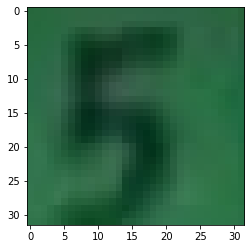

[5]


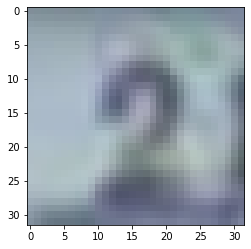

[2]


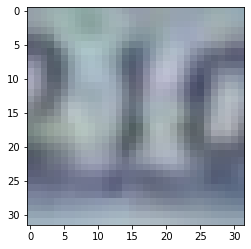

[1]


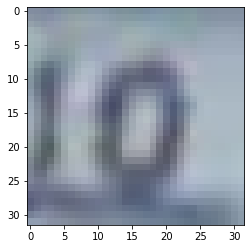

0


In [3]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
%matplotlib inline

image_ind = 0
train_data = sio.loadmat('/content/drive/My Drive/test_32x32.mat')

x_train = train_data['X']
y_train = train_data['y']

i=0
for i in range(0,4):
  plt.imshow(x_train[:,:,:,i])
  plt.show()
  if y_train[i] == 10:
    print('0')
  else:
    print (y_train[i])


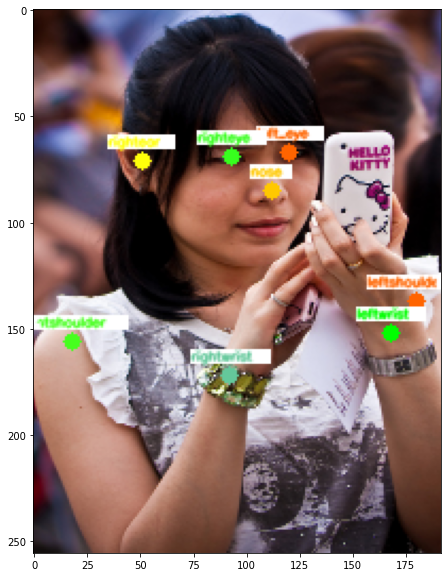

In [15]:
import json
import codecs
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

data = json.load(codecs.open('/content/drive/My Drive/annotations_trainval2017/person_keypoints_val2017.json', 'r', 'utf-8-sig'))
select_pic = 1296

for annotation in data['annotations']:
  image_id = annotation['image_id']
  if image_id == select_pic:
    bbox = annotation['bbox']
    keypoints = annotation['keypoints']
    break

keypointsMapping = [ 
                    ["nose", [0,200,255]],
                    ["left_eye", [0,100,255]],
                    ["righteye", [30,255,55]],
                    ["leftear", [50,130,255]],
                    ["rightear", [10,255,255]],
                    ["leftshoulder", [0,100,255]],
                    ["rightshoulder", [30,255,70]],
                    ["leftelbow", [255,200,100]],
                    ["rightelbow", [255,0,255]],
                    ["leftwrist", [0,255,0]],
                    ["rightwrist", [155,200,100]],
                    ["lefthip", [255,0,255]],
                    ["righthip", [0,0,255]],
                    ["leftknee",  [100,220,0]],
                    ["rightknee", [255,0,0]],
                    ["leftankle", [200,200,0]],
                    ["rightankle", [0,0,0]]
                     ]

image = cv2.imread("/content/drive/My Drive/val2017/000000001296.jpg")
image_old_shape = image.shape
image = image[int(bbox[1]):int(bbox[3]), int(bbox[0]):int(bbox[2])]
image = cv2.resize(image,(192,256))
x_factor = (192/image_old_shape[1])
y_factor = (256/image_old_shape[0])

for i in range(0, 16):
  if keypoints[i + 2*i + 2] != 0:
    image = cv2.circle(image, (int(keypoints[i + 2*i] * x_factor),int(keypoints[i + 2*i + 1] * y_factor)), 1, keypointsMapping[i][1], 5)
    bg_area = cv2.getTextSize(keypointsMapping[i][0], cv2.FONT_HERSHEY_SIMPLEX, 0.25, 1)
    #print(bg_area)
    image = cv2.rectangle(image, (int(keypoints[i + 2*i] * x_factor - bg_area[0][0]/2),int(keypoints[i + 2*i + 1] * y_factor)-12),(int(keypoints[i + 2*i] * x_factor + bg_area[0][0]/2),int(keypoints[i + 2*i + 1] * y_factor  + bg_area[0][1] -12)), [255,255,255], -1)
    image = cv2.putText(image, keypointsMapping[i][0], (int(keypoints[i + 2*i] * x_factor - bg_area[0][0]/2),int(keypoints[i + 2*i + 1] * y_factor - 7)), cv2.FONT_HERSHEY_SIMPLEX, 0.2, keypointsMapping[i][1], 1, cv2.LINE_AA) 


plt.figure(figsize=[10,10])
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))